In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import minimize

In [22]:
#display the data
def displayData(X):
    fig, ax = plt.subplots(10,10,sharex=True,sharey=True)
    img_num = 0
    for i in range(10):
        for j in range(10):
            # Convert column vector into 20x20 pixel matrix
            # You have to transpose to display correctly
            img = X[img_num,:].reshape(20,20).T
            ax[i][j].imshow(img,cmap='gray')
            img_num += 1

    return (fig, ax)


In [18]:
def displayimage(im):
    fig2,ax2=plt.subplots()
    image=im.reshape(20,20).T
    ax2.imshow(image,cmap="gray")
    return (fig2,ax2)



In [5]:
def sigmoid(z):
    return 1.0/(1.0+np.e**(-z))

In [6]:
def lrCostFunction(theta,X,y,reg_param):
    m = len(y) 
    J =((np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
       (1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m +
       (reg_param/m)*np.sum(theta**2))   
    # Gradient
    # Non-regularized 
    grad_0 = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m) # Regularized
    grad_reg = grad_0 + (reg_param/m)*theta
    grad_reg[0] = grad_0[0] 
    return (J,grad_reg)

In [7]:
def oneVsAll(X, y, num_labels, reg_param):
    #Calculates parameters 
    n = np.size(X,1)
    theta = np.zeros((n,num_labels))
    # Function to find parameters for single logit
    def findOptParam(p_num):
        outcome = np.array(y == p_num).astype(int)
        initial_theta = theta[:,p_num]
        results = minimize(lrCostFunction,
                           initial_theta,
                           method='Newton-CG',
                           args=(X,outcome,reg_param),
                           jac=True,
                           tol=1e-6,
                           options={'maxiter':400,
                                    'disp':True})
        theta[:,p_num] = results.x
    
    
    for digit in range(10):
        findOptParam(digit)
    
    return theta

In [8]:
def predictOneVsAllAccuracy(est_theta,X):
    """
    classifies each observation by using the
    highest predicted probability from possible classifications.
    """

    probs = np.dot(X,est_theta)
    predict = np.argmax(probs,axis=1)
    
    return predict

In [9]:
def predict(theta1,theta2,X):
    m = len(X) 
    if np.ndim(X) == 1:
        X = X.reshape((-1,1))     #one dimensional or not
    D1 = np.hstack((np.ones((m,1)),X))
   
    #hidden layer from theta1 parameters
    hidden_pred = np.dot(D1,theta1.T) # (5000 x 401) x (401 x 25) = 5000 x 25
    ones = np.ones((len(hidden_pred),1)) # 5000 x 1
    hidden_pred = sigmoid(hidden_pred)
    hidden_pred = np.hstack((ones,hidden_pred)) # 5000 x 26
    
    #output layer from new design matrix
    output_pred = np.dot(hidden_pred,theta2.T) # (5000 x 26) x (26 x 10)    
    output_pred = sigmoid(output_pred)
    # Get predictions
    p = np.argmax(output_pred,axis=1)
    
    return p

In [14]:

import scipy.io
#parameters	
input_layer_size = 400
num_labels = 10

print("Loading training data...")
raw_mat = scipy.io.loadmat("ex3data1.mat")
X = raw_mat.get("X")
y = raw_mat.get("y").flatten()
y[y== 10] = 0 #chaging label 10 to 0 

Loading training data...


In [15]:
m = np.hstack((np.ones((len(y),1)),X))# add column of ones
# Randomly select 100 datapoints to display
rand_indices = np.random.randint(0,len(m),100)
sel = X[rand_indices,:] 

/home/kalyan/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


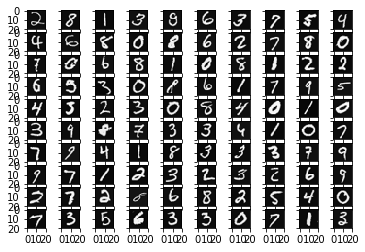

In [25]:
# Display 
digit_grid, ax = displayData(sel)
digit_grid.show()

In [28]:
reg_param = 1.0
theta = oneVsAll(m,y,10,reg_param)

predictions = predictOneVsAllAccuracy(theta,m)
accuracy = np.mean(y == predictions) * 100
print("Training Accuracy with logit: ", accuracy, "%")
input("Program pauses, press enter to continue...")


         Current function value: 0.029676
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 84
         Hessian evaluations: 0
         Current function value: 0.033647
         Iterations: 9
         Function evaluations: 33
         Gradient evaluations: 96
         Hessian evaluations: 0
         Current function value: 0.077298
         Iterations: 10
         Function evaluations: 34
         Gradient evaluations: 176
         Hessian evaluations: 0
         Current function value: 0.082173
         Iterations: 9
         Function evaluations: 46
         Gradient evaluations: 134
         Hessian evaluations: 0
         Current function value: 0.060656
         Iterations: 10
         Function evaluations: 54
         Gradient evaluations: 136
         Hessian evaluations: 0
         Current function value: 0.088061
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 132
         Hessian evaluations: 0
   

''

In [29]:

#Neural Network
# Load pre-estimated weights
print("Loading saved neural networks parameters...")
raw_params = scipy.io.loadmat("ex3weights.mat")
theta1 = raw_params.get("Theta1") # 25 x 401
theta2 = raw_params.get("Theta2") # 10 x 26
# Parameters in theta1,theta2 are based on 1 indexing. add 1 and take the mod w.r.t. 10 so 10s become zeros and everything else gets bumped up one.

predictions = (predict(theta1,theta2,X) + 1) % 10
accuracy = np.mean(y == predictions) * 100
print("Training Accuracy with neural network: ", accuracy, "%")

Loading saved neural networks parameters...
Training Accuracy with neural network:  97.52 %
